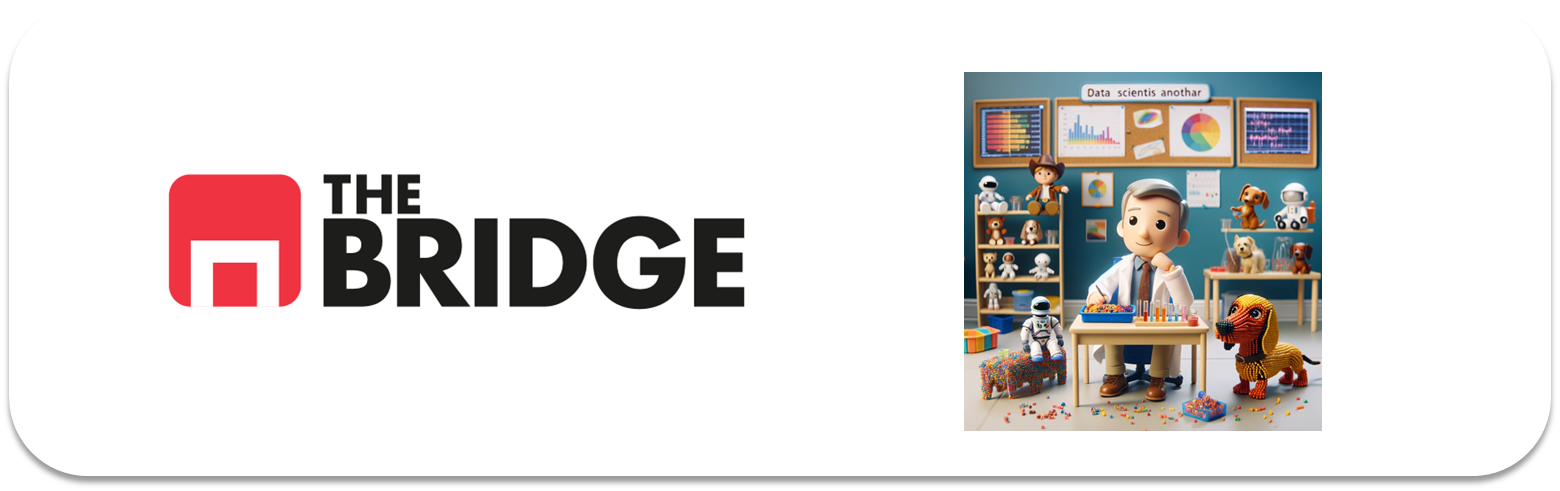

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()


def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

** He tenido errores a la hora de cargar el dataset directamente desde seaborn (creo que es problema de verificación de certificados ssl según lo que me decía Chatgpt), así que leeré el csv de data directamente

In [21]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [6]:
pd.set_option("display.max_columns", None)
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [9]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [14]:
nulos = df_titanic.isnull().sum()
porcentaje_nulos = (nulos/len(df_titanic))*100
print(porcentaje_nulos)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


- La columna de deck está infestada de nulos así que la podríamos eliminar
- La de age se podría inspeccionar y arreglar (tal vez con la sustitución de valores por medias agrupadas), pero para su representación visual a primeras, al haber tanto porcentaje de nulo, no lo voy a tomar en cuenta y los voy a ignorar

In [66]:
df_titanic = df_titanic.drop('parch', axis=1)
df_titanic = df_titanic.drop('deck', axis=1)

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


In [16]:
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| Survived      | Estado vital del viajero después del viaje |
| Pclass         | Descripción numérica de la clase en la que se viajaba |
| Sex | Hombre o mujer |
| Age | La edad que tienen |
| Sibsp | Con cuantas personas viajan acompañados |
| Fare | El dinero que pagaron |
| Embarked | La inicial de la ciudad de embarque |
| Class | La clase en la que viajaban |
| Who | Hombre o mujer o niño |
| Adult_male | Si es un hombre adulto o no |
| Embark_town | La ciudad donde embarcaron |
| alive | Si está vivo o no |
| alone | Si estaba solo o no |



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [23]:

filtro = (df_titanic['embarked'] == "S")
df_titanic.loc[filtro, 'embarked'] = "Southampton"

filtro = (df_titanic['embarked'] == "C")
df_titanic.loc[filtro, 'embarked'] = "Cherbourg"

filtro = (df_titanic['embarked'] == "Q")
df_titanic.loc[filtro, 'embarked'] = "Queenstown"

df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,Southampton,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,Cherbourg,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,Southampton,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,Southampton,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,Southampton,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,Southampton,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,30.0000,Southampton,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,Southampton,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,30.0000,Cherbourg,First,man,True,C,Cherbourg,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [69]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

variabilidad(df_titanic)

,std,mean,CV
survived,0.486592,0.383838,1.267701
pclass,0.836071,2.308642,0.362149
age,14.526497,29.699118,0.489122
sibsp,1.102743,0.523008,2.108464
fare,49.693429,32.204208,1.543073


- Fare tiene una alta variabilidad así que habría que llevar cuidado al tratar con su distribución de valores
- Age también es algo alta

### #2.1 Categóricas

In [67]:
categoricas_titanic = ["survived","who","alone","class","embarked"]

In [50]:
for catego in categoricas_titanic:
    print(f"Para {catego}:")
    print(df_titanic[catego].value_counts())
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n")

Para survived:
survived
0    549
1    342
Name: count, dtype: int64
survived
0    61.616162
1    38.383838
Name: count, dtype: float64


Para who:
who
man      537
woman    271
child     83
Name: count, dtype: int64
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64


Para alone:
alone
True     537
False    354
Name: count, dtype: int64
alone
True     60.26936
False    39.73064
Name: count, dtype: float64


Para class:
class
Third     491
First     216
Second    184
Name: count, dtype: int64
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64


Para embarked:
embarked
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
embarked
Southampton    72.278339
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64




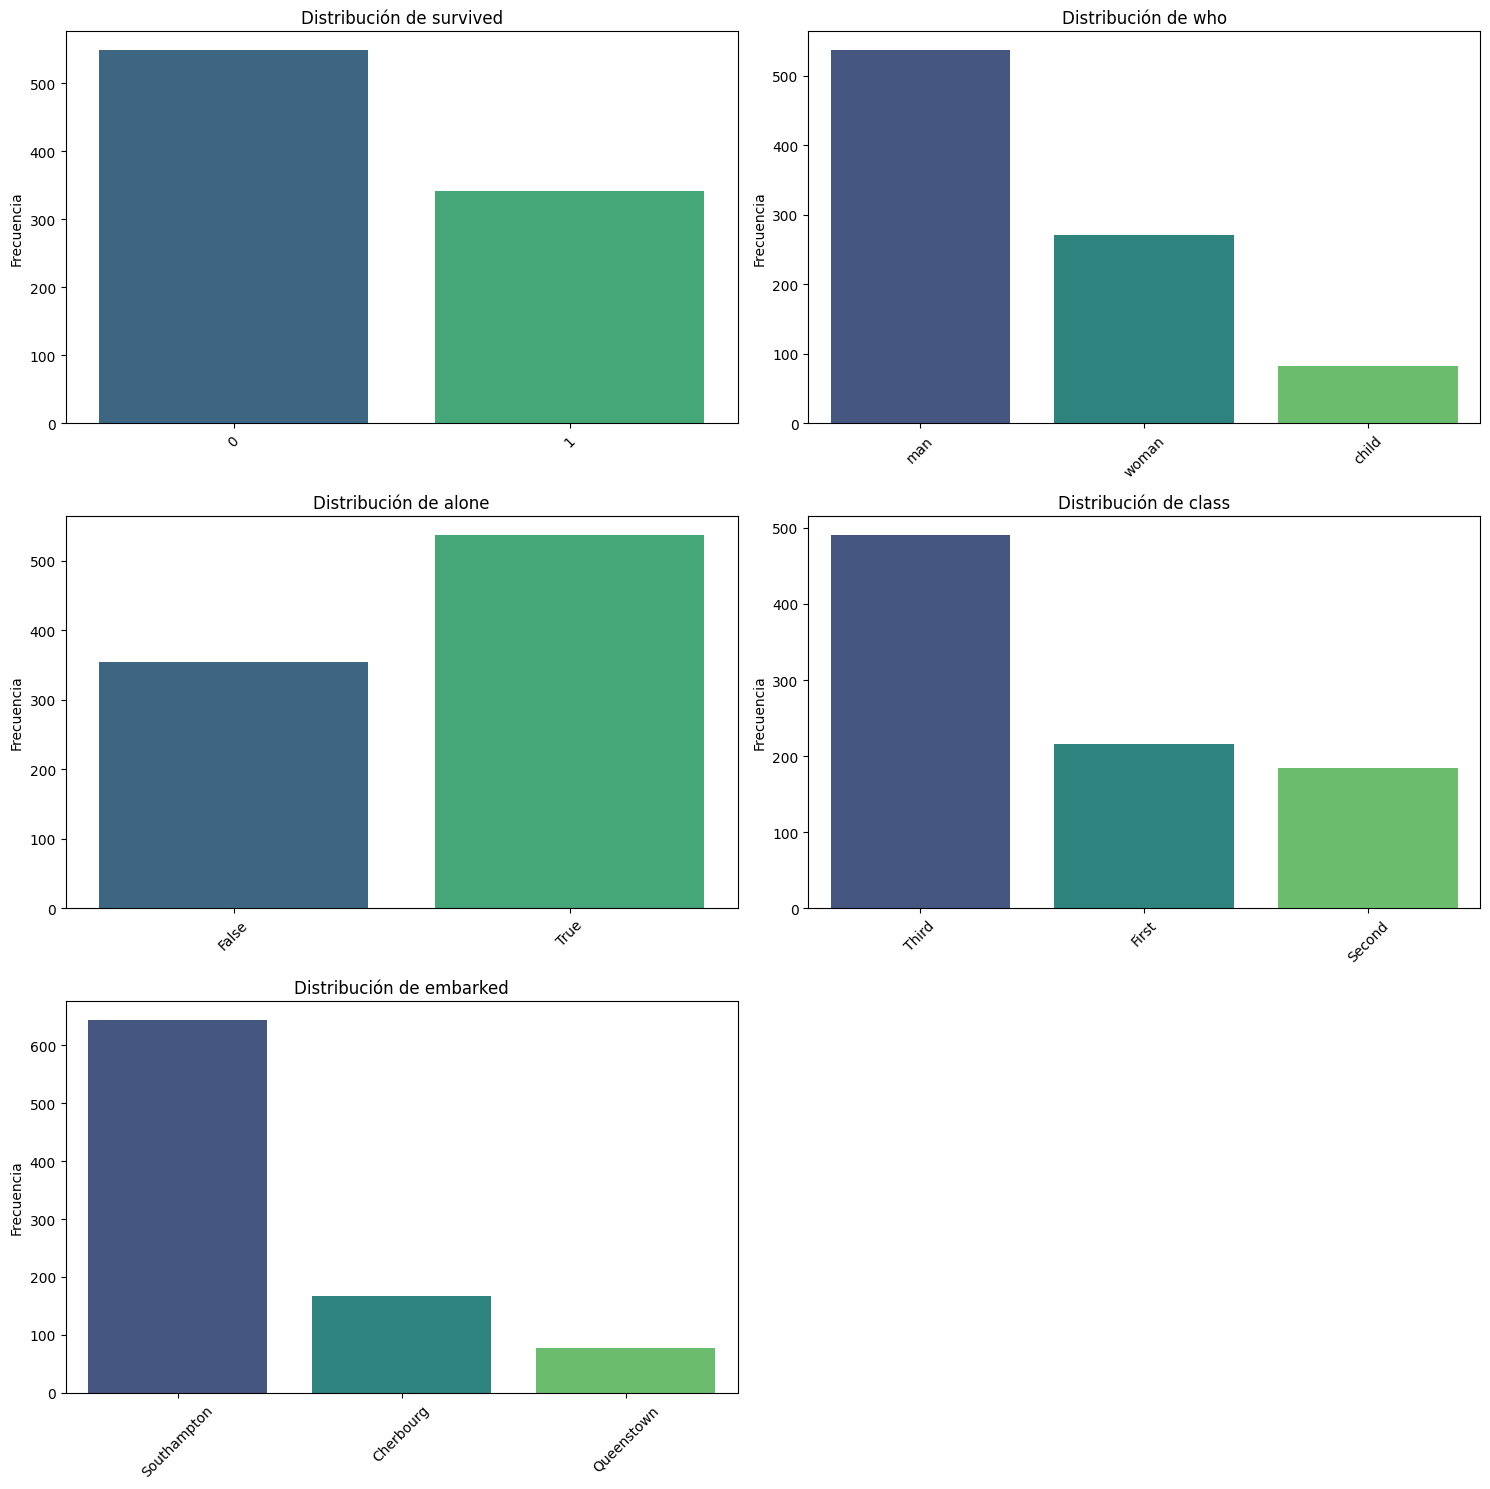

In [43]:
pinta_distribucion_categoricas(df_titanic, categoricas_titanic)

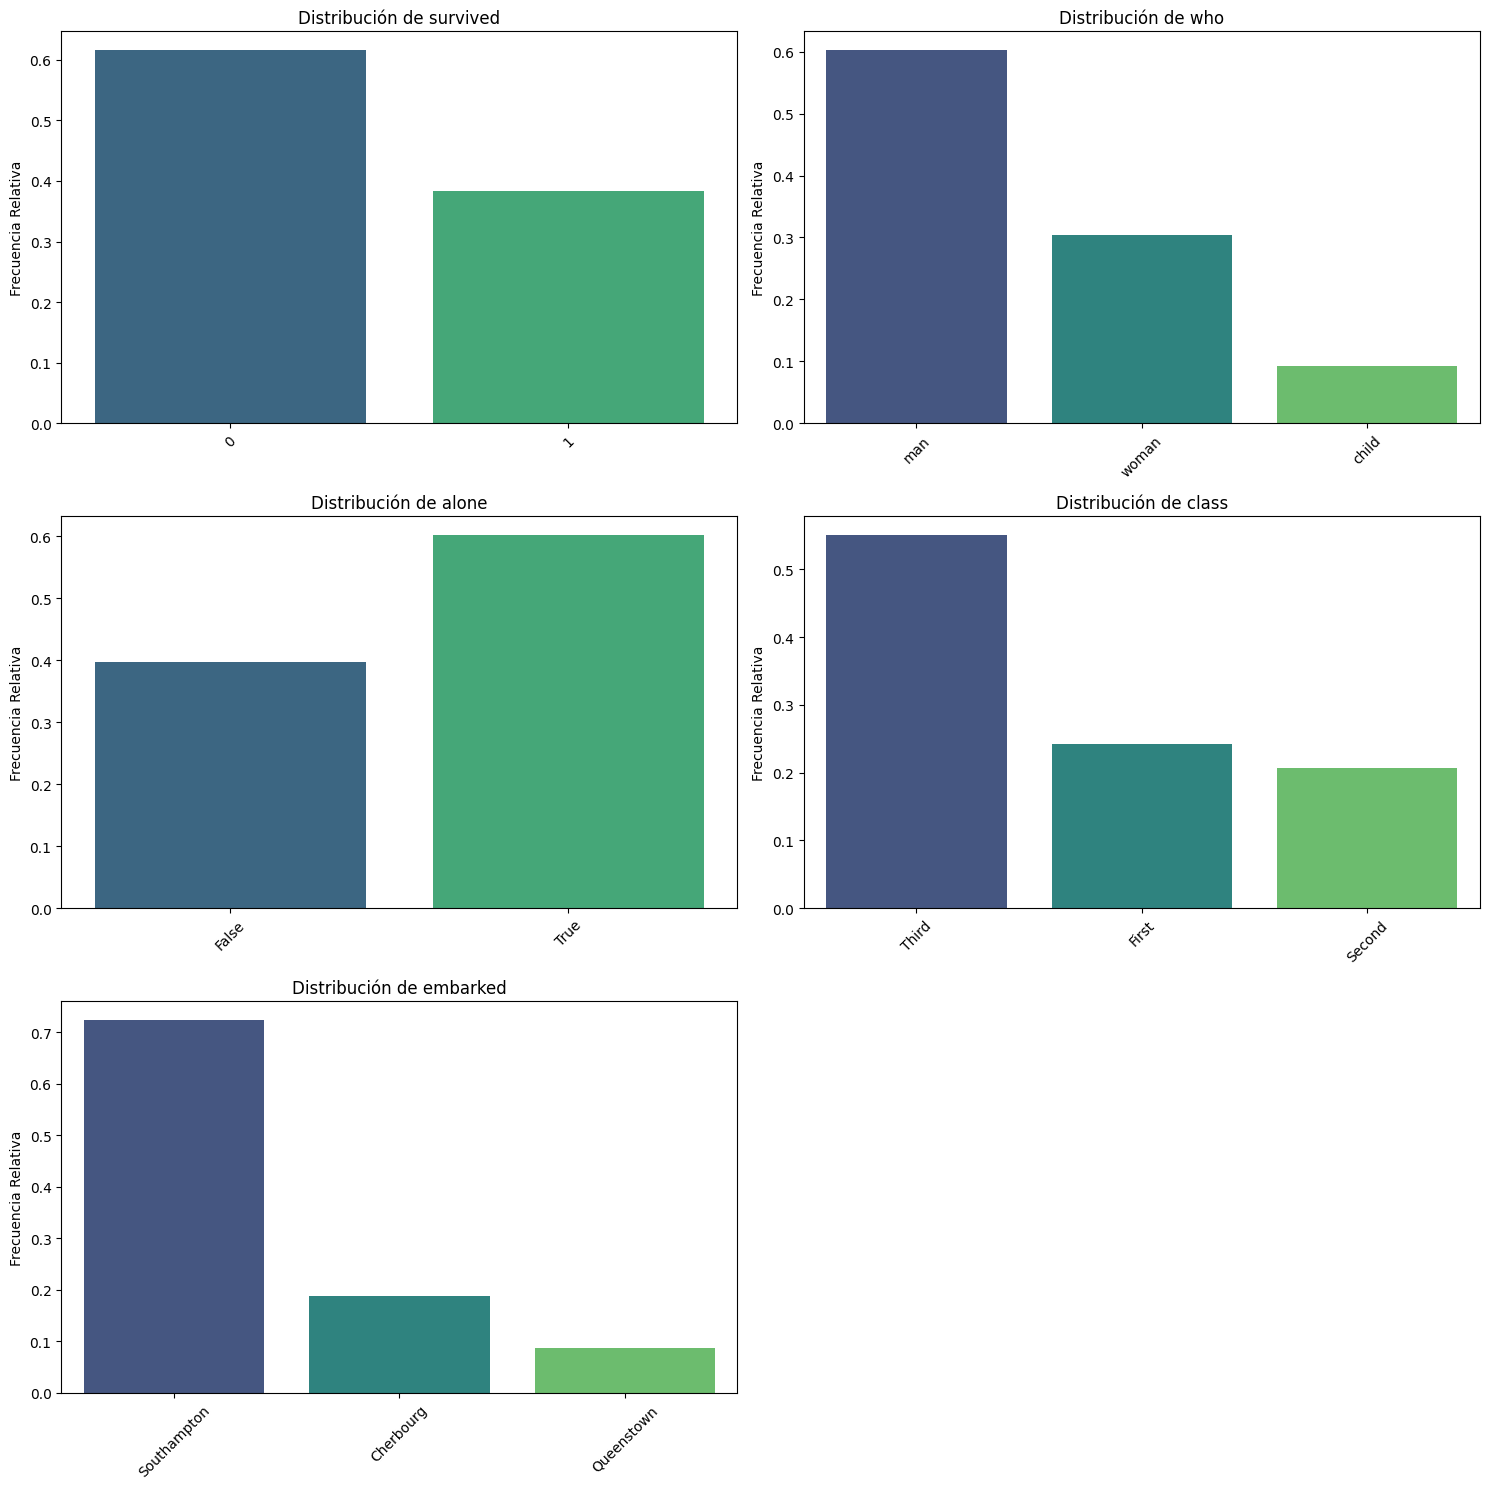

In [51]:
pinta_distribucion_categoricas(df_titanic, categoricas_titanic, True)

- Aproximadamente 2 tercios de las personas que embarcaron en el Titanic fallecieron durante el viaje.
- El 60% de los viajeros eran hombres adultos, el 30% mujeres y el 10% niños.
- El 60% de los viajeros lo hacían sin compañía alguna.
- Aproximadamente el 50% de los viajeros lo hacían en tercera clase, mientras que el resto lo hacían en clases más altas.
- El 70% embarcó en Southampton, el lugar de salida del barco.

### #2.2 Numéricas

Fare, age

In [52]:
df_titanic["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

(2,)


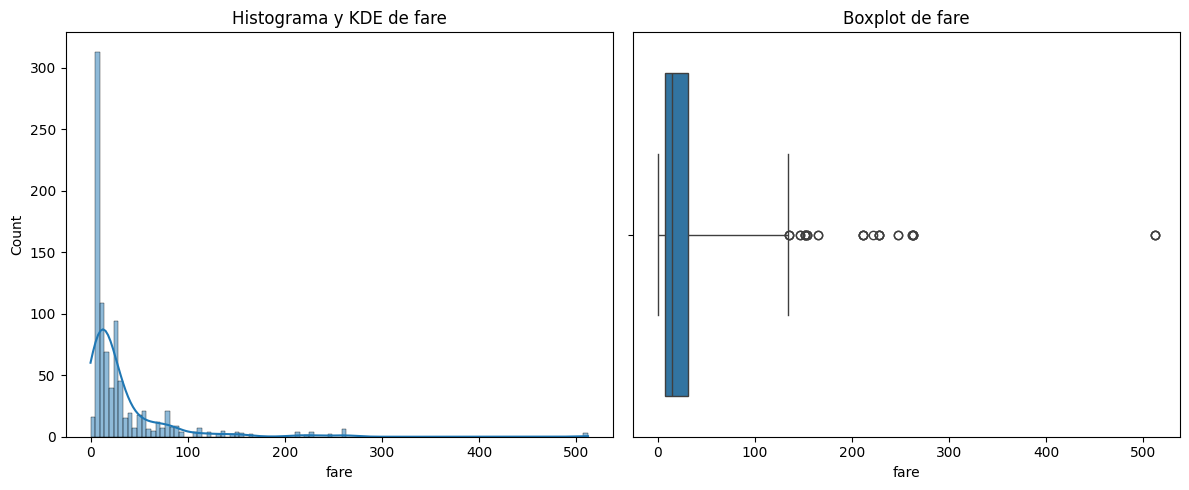

In [54]:
plot_combined_graphs(df_titanic, ["fare"], whisker_width= 4.5)

- Se ve que existe mucho outlier, varias barras entre 200 y 300 y varios en 500 que hace que la función tenga una cola muy larga. Estaría interesante ver que es lo que ocurre con ellos y a que tipo de cliente pertenecen

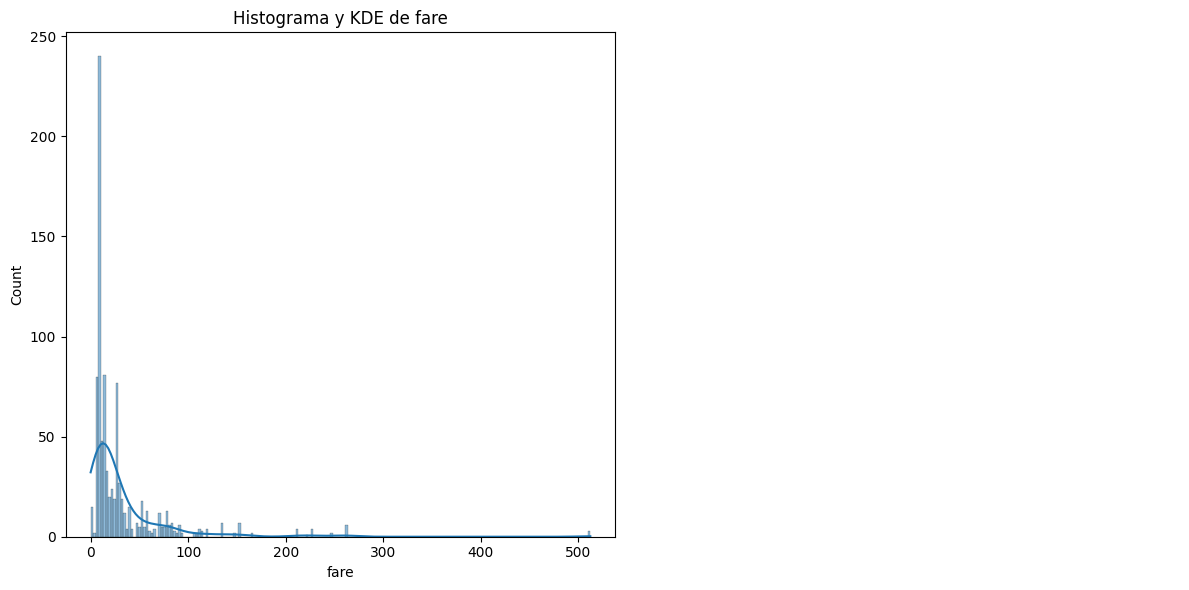

In [76]:
plot_histo_dens(df_titanic,["fare"], 200)

- Para apreciar un poco más claro de donde vienen los outliers, hago el plot con mayor números de bins.
- También aprecio que la gran mayoría compro un billete cercano a las 10-15 libras, muy distinto de la media obtenida anteriormente

In [53]:
df_titanic["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

(2,)


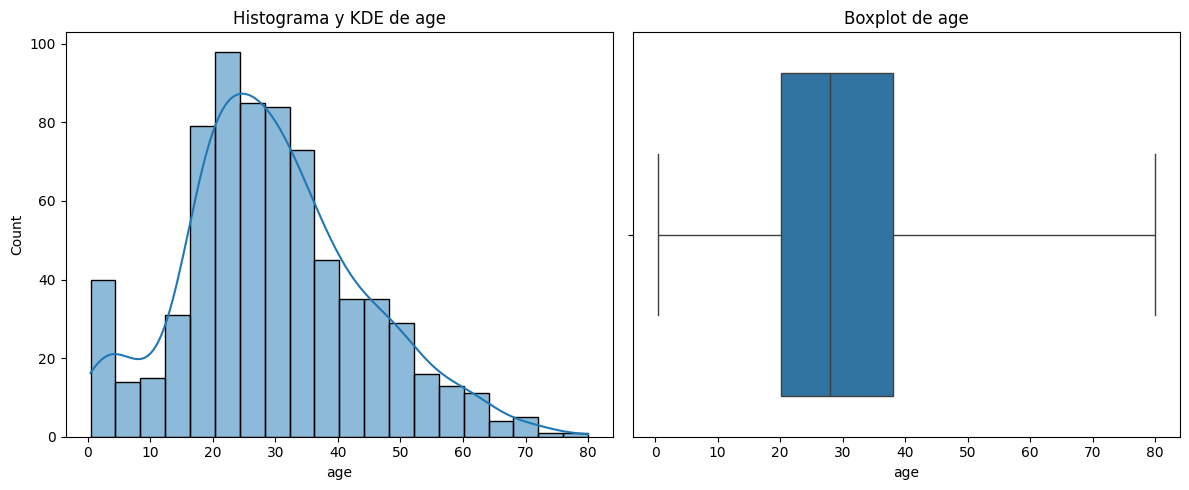

In [71]:
plot_combined_graphs(df_titanic, ["age"], whisker_width= 4.5)

El histograma se asemeja a una distribución binomial pero con un pico entre 0 y 5 años, perteneciente a los niños, su media se ubica cerca de los 30 y su desviación estándar está por los 14